# Face and eyes detection 

In [64]:
import face_recognition as fr
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# images load
image1 =fr.load_image_file("/content/drive/MyDrive/eyes/half.jpg")
image2 =fr.load_image_file("/content/drive/MyDrive/eyes/open_eyes_m_1.jpg")

In [67]:
# convert to gray
gray_img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [68]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [69]:
faces1 = face_cascade.detectMultiScale(gray_img2, 1.3, 5)

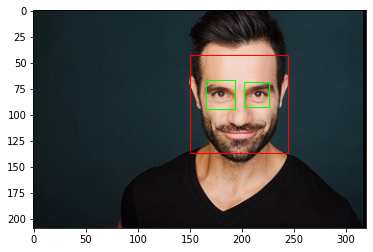

In [70]:
for (x,y,w,h) in faces1:
    # face detection
    image2 = cv2.rectangle(image2,(x,y),(x+w,y+h),(255,0,0),1)
    roi_gray = gray_img2[y:y+h, x:x+w]
    roi_color = image2[y:y+h, x:x+w]

    # eyes detection
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.2, 6)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
        
plt.imshow(image2)

## Open/closed *eyes*

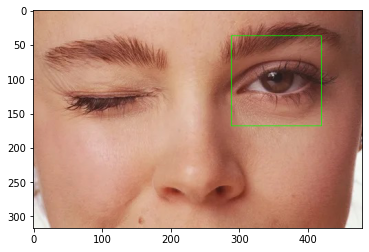

In [71]:
eyes = eye_cascade.detectMultiScale(gray_img1, 1.6, 6)
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(image1,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)

plt.imshow(image1)

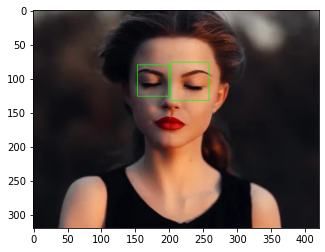

In [72]:
image3 =fr.load_image_file("/content/drive/MyDrive/eyes/closed_eyes_2.jpg")
gray_img3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray_img3, 1.2, 6)
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(image3,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)

plt.imshow(image3)